# Classificador utilizando Redes Neurais Convolucionais
***

## Instalação dos pacotes
***

In [53]:
# pacote de inteligência artificial
import tensorflow as tf
# pacote de gerenciamento de conjuntos de dados
import pandas as pd
# pacote de procedimentos numéricos
import numpy as np
# pacote de visualização gráfica
import matplotlib.pyplot as plt
# pacote com funções para auxiliar o aprendizado de máquina
from sklearn.model_selection import train_test_split

## Organizando o Dataframe
***

In [42]:
# conjunto de dados de treinamento, validação e teste
dataframe1 = pd.read_csv('../csv_data/braille_character1.csv', delimiter = ',', 
                         header = 0, usecols = ['Path', 'Labels'])
dataframe2 = pd.read_csv('../csv_data/braille_character2.csv', delimiter = ',',
                         header = 0, usecols = ['Path', 'Labels'])
dataframe3 = pd.read_csv('../csv_data/braille_character3.csv', delimiter = ',',
                         header = 0, usecols = ['Path', 'Labels'])

In [ ]:
# organizando a referência aos arquivos do primeiro dataframe
dataframe1_files = dataframe1['Path']
for i in range(0, len(dataframe1_files)):
    dataframe1_files[i] = '../files/images1/'+dataframe1_files[i]
dataframe1['Path'] = dataframe1_files

In [ ]:
# organizando a referência aos arquivos do segundo dataframe
dataframe2_files = dataframe2['Path']
for i in range(0, len(dataframe2_files)):
    dataframe2_files[i] = '../files/images2/'+dataframe2_files[i]
dataframe2['Path'] = dataframe2_files

In [ ]:
# organizando a referência aos arquivos do terceiro dataframe
dataframe3_files = dataframe3['Path']
for i in range(0, len(dataframe3_files)):
    dataframe3_files[i] = '../files/images3/'+dataframe3_files[i]
dataframe3['Path'] = dataframe3_files

In [51]:
# criando um dataframe com todas as imagens selecionadas
dataframe = pd.concat((dataframe1, dataframe2, dataframe3))

## Separando as Imagens de Treinamento, Validação e Teste


In [73]:
# separando o dataframe de forma estratificada entre imagens de treinamento, validação e teste 
train_df, validation_df = train_test_split(dataframe, train_size = 0.8, random_state = 42, 
                                           stratify = dataframe['Labels'], shuffle = True)
validation_df, test_df = train_test_split(validation_df, test_size = 0.5, random_state = 42, 
                                          stratify = validation_df['Labels'], shuffle = True)

In [76]:
# visualizando a dimensão dos dados
print('Dimensão dos Dados de Treinamento: ', train_df.shape)
print('Dimensão dos Dados de Validação:', validation_df.shape)
print('Dimensão dos Dados de Teste:', test_df.shape)

Dimensão dos Dados de Treinamento:  (2952, 2)
Dimensão dos Dados de Validação: (369, 2)
Dimensão dos Dados de Teste: (369, 2)


In [113]:
# organizando a legenda do eixo x no gráfico de barra
xticks = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
xticks = np.array(xticks)

Text(0, 0.5, 'Quantidade de imagens')

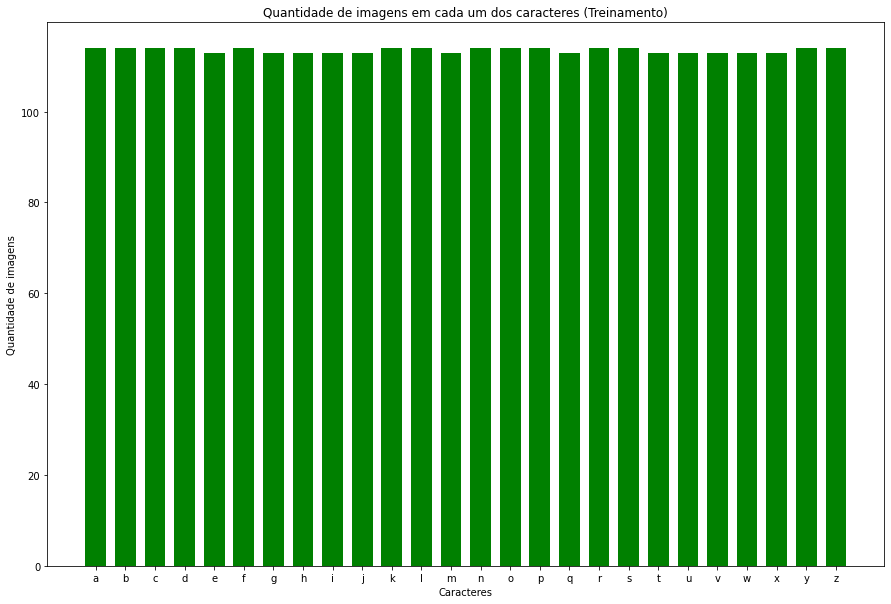

In [135]:
# gráfico de visualização da quantidade de imagens de treinamento
labels = train_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Treinamento)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')


Text(0, 0.5, 'Quantidade de imagens')

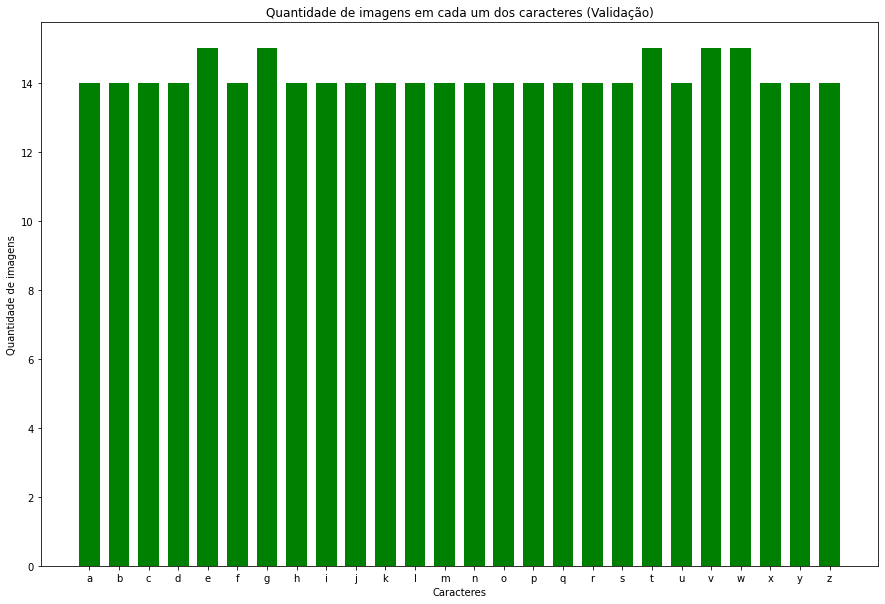

In [136]:
# gráfico de visualização da quantidade de imagens de validação
labels = validation_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Validação)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')


Text(0, 0.5, 'Quantidade de imagens')

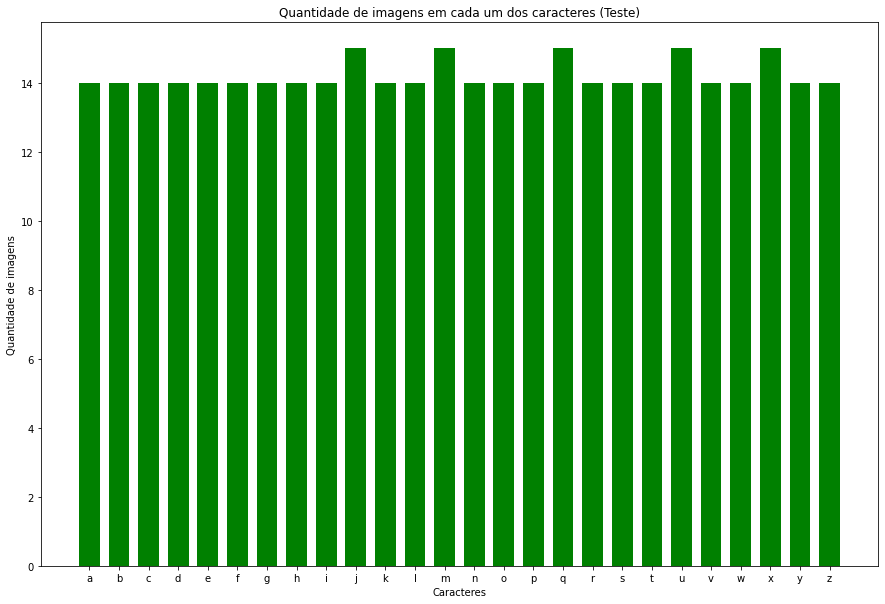

In [137]:
# gráfico de visualização da quantidade de imagens de test
labels = test_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Teste)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')
